In [1]:
# coding: UTF-8
import math
import matplotlib.pyplot as plt

In [2]:
# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

In [3]:
# ニューロン
class Neuron:
    input_sum = 0.0
    output = 0.0

    def setInput(self, inp):
        self.input_sum += inp

    def getOutput(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0.0
        self.output = 0.0

In [4]:
# ニューラルネットワーク
class NeuralNetwork:
    # 入力の重み
    w_im = [[0.5, 0.5], [-0.5, 1.0], [0.5, -0.5]]
    w_mo = [0.1, -0.5, 0.200]

    # 各層の宣言
    input_layer = [0.0, 0.0, 1.0]
    middle_layer = [Neuron(), Neuron(), 1.0]
    output_layer = Neuron()

    # 実行
    def commit(self, input_data):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]

        self.middle_layer[0].reset()
        self.middle_layer[1].reset()

        self.output_layer.reset()

        # 入力層→中間層
        self.middle_layer[0].setInput(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].setInput(self.input_layer[1] * self.w_im[1][0])
        self.middle_layer[0].setInput(self.input_layer[2] * self.w_im[2][0])

        self.middle_layer[1].setInput(self.input_layer[0] * self.w_im[0][1])
        self.middle_layer[1].setInput(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].setInput(self.input_layer[2] * self.w_im[2][1])

        # 中間層→出力層
        self.output_layer.setInput(self.middle_layer[0].getOutput() * self.w_mo[0])
        self.output_layer.setInput(self.middle_layer[1].getOutput() * self.w_mo[1])
        self.output_layer.setInput(self.middle_layer[2] * self.w_mo[2])

        return self.output_layer.getOutput()

    def learn(self, input_data):
        # 出力値
        output_data = self.commit([input_data[0], input_data[1]])
        correct_value = input_data[2]
        # 学習係数
        k = 0.3

        # 出力層→中間層
        # δmo = (出力値 - 正解値) × 出力の微分
        dalta_w_mo = (correct_value - output_data) * output_data * (1.0 - output_data)
        old_w_mo = list(self.w_mo)
        # 修正量 = δmo × 中間層の値 × 学習係数
        self.w_mo[0] += self.middle_layer[0].output * dalta_w_mo * k
        self.w_mo[1] += self.middle_layer[1].output * dalta_w_mo * k
        self.w_mo[2] += self.middle_layer[2] * dalta_w_mo * k

        # 中間層→入力層
        # δim = δmo × 中間出力の重み × 中間層の微分
        delta_w_im = [
            dalta_w_mo * old_w_mo[0] * self.middle_layer[0].output * (1.0 - self.middle_layer[0].output),
            dalta_w_mo * old_w_mo[1] * self.middle_layer[1].output * (1.0 - self.middle_layer[1].output)
        ]
        # 修正量 = δim × 入力層の値 × 学習係数
        self.w_im[0][0] += self.input_layer[0] * delta_w_im[0] * k
        self.w_im[0][1] += self.input_layer[0] * delta_w_im[1] * k
        self.w_im[1][0] += self.input_layer[1] * delta_w_im[0] * k
        self.w_im[1][1] += self.input_layer[1] * delta_w_im[1] * k
        self.w_im[2][0] += self.input_layer[2] * delta_w_im[0] * k
        self.w_im[2][1] += self.input_layer[2] * delta_w_im[1] * k


In [5]:
# 基準点 (データを 0.0-1.0 の範囲に収める)
base_x = 34.2
base_y = 135.1
base_rate = 0.25

In [6]:
# 座標変換関数
def to_train(data):
    return [(float(data[0]) - base_x) * base_rate, (float(data[1]) - base_y) * base_rate, int(data[2])]

# 座標変換関数
def to_test(data):
    return [(float(data[0]) - base_x) * base_rate, (float(data[1]) - base_y) * base_rate]

# 座標変換関数
def from_train(data):
    return [data[0] / base_rate + base_x, data[1] / base_rate + base_y]

In [7]:
# ファイルの読み込み
training_data = []
training_data_file = open("locations.training.csv", "r")
for line in training_data_file:
    data = line.rstrip().split(",")
    training_data.append(to_train(data))
training_data_file.close()

#print(training_data)

In [8]:
# ニューラルネットワーク
neural_network = NeuralNetwork()

In [14]:
# 学習
print(neural_network.w_im)
print(neural_network.w_mo)

for t in range(0, 1000):
    for data in training_data:
        neural_network.learn(data)

print(neural_network.w_im)
print(neural_network.w_mo)

[[25.593508771279193, -4.89968497366642], [-7.538225231961233, -0.5876522127267265], [-9.268342931419584, 0.023402366472916443]]
[-19.418525856170884, 3.7964856050122617, 5.095357555977076]
[[25.31114922264708, -5.795953033573599], [-22.022508672098446, -18.201217858929912], [-3.1394781608673354, 3.6466293972898574]]
[-17.293735356064598, 14.874641429903374, 8.587986125273614]


In [10]:
# テスト用データ
test_data = [[34.6, 138.0], [34.6, 138.18], [35.4, 138.0], [34.98, 138.1], [35.0, 138.25], [35.4, 137.6], [34.98, 137.52], [34.5, 138.5], [35.4, 138.1]]

for index in range(len(test_data)):
    test_data[index] = to_test(test_data[index])    

#print(test_data)

In [11]:
# 表示用結果データ
position_in_fukui_result = [[], []]
position_out_fukui_result = [[], []]

for data in test_data:
    position = from_train(data)
    if neural_network.commit(data) < 0.5:
        position_in_fukui_result[0].append(position[1])
        position_in_fukui_result[1].append(position[0])
    else:
        position_out_fukui_result[0].append(position[1])
        position_out_fukui_result[1].append(position[0])


In [12]:
# 表示用訓練用データ
position_in_fukui_training = [[], []]
position_out_fukui_training = [[], []]
for data in training_data:
    position = from_train(data)
    if data[2] < 0.5:
        position_in_fukui_training[0].append(position[1])
        position_in_fukui_training[1].append(position[0])
    else:
        position_out_fukui_training[0].append(position[1])
        position_out_fukui_training[1].append(position[0])

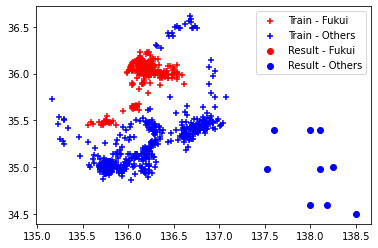

In [13]:
# プロット
plt.scatter(position_in_fukui_training[0], position_in_fukui_training[1], c="red", label="Train - Fukui", marker="+")
plt.scatter(position_out_fukui_training[0], position_out_fukui_training[1], c="blue", label="Train - Others", marker="+")
plt.scatter(position_in_fukui_result[0], position_in_fukui_result[1], c="red", label="Result - Fukui", marker="o")
plt.scatter(position_out_fukui_result[0], position_out_fukui_result[1], c="blue", label="Result - Others", marker="o")
plt.legend()
plt.show()